# Xử lí và trực quan hóa dữ liệu online retail

### Nhập thư viện 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Xem 5 dòng đầu tiên

In [8]:
df = df[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','Description','InvoiceDate','Country']]
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,3.39,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,2.75,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,3.39,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,3.39,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom


### Thống kê mô tả dataset

In [ ]:
df.describe(include='all')

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Description,InvoiceDate,Country
count,406829.000000,541909.0,541909,541909.000000,541909.000000,540455,541909,541909
unique,NaN,25900.0,4070,NaN,NaN,4223,NaN,38
top,NaN,573585.0,85123A,NaN,NaN,WHITE HANGING HEART T-LIGHT HOLDER,NaN,United Kingdom
freq,NaN,1114.0,2313,NaN,NaN,2369,NaN,495478
mean,15287.690570,NaN,NaN,9.552250,4.611114,NaN,2011-07-04 13:34:57.156386048,NaN
min,12346.000000,NaN,NaN,-80995.000000,-11062.060000,NaN,2010-12-01 08:26:00,NaN
25%,13953.000000,NaN,NaN,1.000000,1.250000,NaN,2011-03-28 11:34:00,NaN
50%,15152.000000,NaN,NaN,3.000000,2.080000,NaN,2011-07-19 17:17:00,NaN
75%,16791.000000,NaN,NaN,10.000000,4.130000,NaN,2011-10-19 11:27:00,NaN
max,18287.000000,NaN,NaN,80995.000000,38970.000000,NaN,2011-12-09 12:50:00,NaN


### Thông tin của dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   406829 non-null  float64       
 1   InvoiceNo    541909 non-null  object        
 2   StockCode    541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   UnitPrice    541909 non-null  float64       
 5   Description  540455 non-null  object        
 6   InvoiceDate  541909 non-null  datetime64[ns]
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Độ lớn của data

In [ ]:
df.shape

(541909, 8)

### Kiểm tra giá trị bị thiếu 

In [14]:
df.isna().sum()


CustomerID     135080
InvoiceNo           0
StockCode           0
Quantity            0
UnitPrice           0
Description      1454
InvoiceDate         0
Country             0
dtype: int64

#### CustomerID thiếu 135080 giá trị , Description thiếu 1454 giá trị 

#### Danh sách các quốc gia xuất hiện trong dữ liệu bán lẻ
+ Dữ liệu chứa thông tin từ nhiều quốc gia khác nhau, giúp chúng ta phân tích được đặc điểm mua hàng theo vùng địa lý.

In [ ]:
country = df['Country']
unique_countries = country.drop_duplicates()
print(unique_countries)


0               United Kingdom
26                      France
197                  Australia
385                Netherlands
1109                   Germany
1236                    Norway
1404                      EIRE
5320               Switzerland
6421                     Spain
6608                    Poland
7134                  Portugal
7214                     Italy
7279                   Belgium
7986                 Lithuania
9783                     Japan
14938                  Iceland
20000          Channel Islands
20017                  Denmark
29732                   Cyprus
30078                   Sweden
31464                  Austria
31982                   Israel
34083                  Finland
38313                  Bahrain
69007                   Greece
69623                Hong Kong
70758                Singapore
72985                  Lebanon
89570     United Arab Emirates
100810            Saudi Arabia
103598          Czech Republic
119191                  Canada
152712  

#### Tính Tổng Giá Trị Giao Dịch của Mỗi Bản Ghi
+ Mỗi dòng dữ liệu giờ đây có thêm cột TotalAmount, thể hiện tổng số tiền giao dịch (số lượng × giá đơn vị), giúp phân tích doanh thu chi tiết hơn.

In [17]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']


#### Tạo DataFrame con và Kiểm tra Tham chiếu Bộ nhớ
+ new_df là bản sao chứa một số cột chọn lọc từ df.

+ new_df2 là tham chiếu trực tiếp tới df, không phải bản sao mới.

+ Việc kiểm tra trả về True nghĩa là new_df2 và df cùng trỏ tới một đối tượng trong bộ nhớ.

In [56]:
# Lấy subset các cột tạo dataframe mới (bản sao)
new_df = df[['CustomerID', 'InvoiceNo', 'StockCode', 'Quantity', 'TotalAmount', 'InvoiceDate', 'Country']]

# Gán biến mới tham chiếu tới cùng dataframe df
new_df2 = df

# Kiểm tra xem new_df2 và df có cùng object trong bộ nhớ không
same_object = (new_df2 is df)

print("new_df là bản sao của df (subset các cột):")
print(new_df.head())


same_object  # True nếu cùng object, False nếu không


new_df là bản sao của df (subset các cột):
   CustomerID InvoiceNo StockCode  Quantity  TotalAmount         InvoiceDate  \
0     17850.0    536365    85123A         6        15.30 2010-12-01 08:26:00   
1     17850.0    536365     71053         6        20.34 2010-12-01 08:26:00   
2     17850.0    536365    84406B         8        22.00 2010-12-01 08:26:00   
3     17850.0    536365    84029G         6        20.34 2010-12-01 08:26:00   
4     17850.0    536365    84029E         6        20.34 2010-12-01 08:26:00   

          Country  
0  United Kingdom  
1  United Kingdom  
2  United Kingdom  
3  United Kingdom  
4  United Kingdom  


True

#### In 5 dòng đầu của dataframe mới

In [ ]:
new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country
0,17850.0,536365,85123A,6,15.30,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,20.34,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,22.00,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,20.34,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,20.34,2010-12-01 08:26:00,United Kingdom


#### Tổng số lượng sản phẩm bán ra theo từng quốc gia
+ Tính tổng số lượng sản phẩm bán được ở mỗi quốc gia và sắp xếp theo thứ tự giảm dần, giúp xác định quốc gia có lượng mua hàng lớn nhất.

In [24]:
country_price = new_df.groupby('Country')['Quantity'].sum().reset_index()
country_price = country_price.sort_values(by='Quantity', ascending=False)
country_price


,Country,Quantity
36,United Kingdom,4263829
24,Netherlands,200128
10,EIRE,142637
14,Germany,117448
13,France,110480
0,Australia,83653
32,Sweden,35637
33,Switzerland,30325
31,Spain,26824
20,Japan,25218


#### Lấy 5 quốc gia có số lượng sản phẩm bán ra cao nhất

In [57]:
bp_country_top = country_price['Country'].head(5)
bp_quantity_top = country_price['Quantity'].head(5)


#### Biểu đồ Thanh Ngang: Top 5 Quốc Gia Có Lượng Mua Hàng Cao Nhất
+ Biểu đồ thanh ngang cho thấy quốc gia đứng đầu có lượng mua hàng vượt trội, chiếm phần lớn tổng số lượng bán ra so với các quốc gia còn lại trong top 5. Khoảng cách rõ rệt giữa các thanh thể hiện sự tập trung mua hàng ở một số quốc gia chủ chốt, cho thấy thị trường chính rất rõ ràng. Điều này giúp xác định những khu vực quan trọng để tập trung phát triển và tăng doanh số.

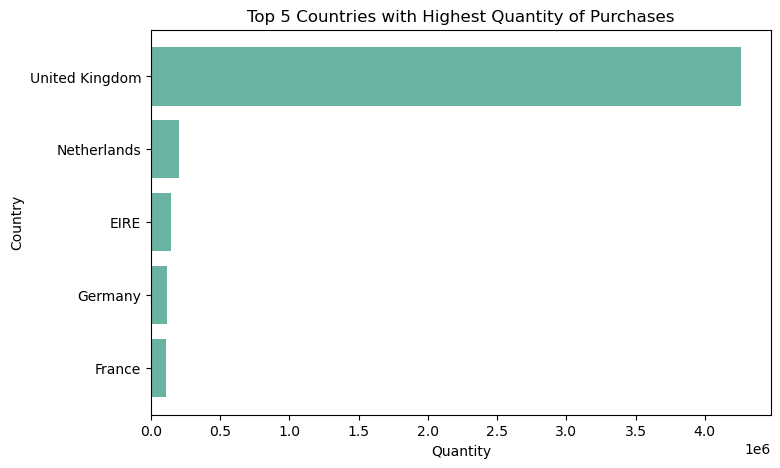

In [ ]:

plt.figure(figsize=(8,5))
plt.barh(bp_country_top, bp_quantity_top, color="#69b3a2")
plt.xlabel('Quantity')
plt.ylabel('Country')
plt.title('Top 5 Countries with Highest Quantity of Purchases')
plt.gca().invert_yaxis()
plt.show()


#### Lấy 5 quốc gia có số lượng sản phẩm bán ra thấp nhất

In [ ]:
bp_country_low = country_price['Country'].iloc[33:38]  
bp_quantity_low = country_price['Quantity'].iloc[33:38]


#### Biểu đồ Thanh Ngang: 5 Quốc Gia Có Lượng Mua Hàng Thấp Nhất
+ Biểu đồ cho thấy rõ 5 quốc gia có số lượng mua hàng thấp nhất trong dữ liệu. Các quốc gia này có sự khác biệt không quá lớn về lượng mua, phản ánh thị trường nhỏ hoặc ít hoạt động mua bán. Đây có thể là cơ hội để xem xét chiến lược tiếp cận, hoặc đánh giá lại tiềm năng phát triển tại những vùng này.

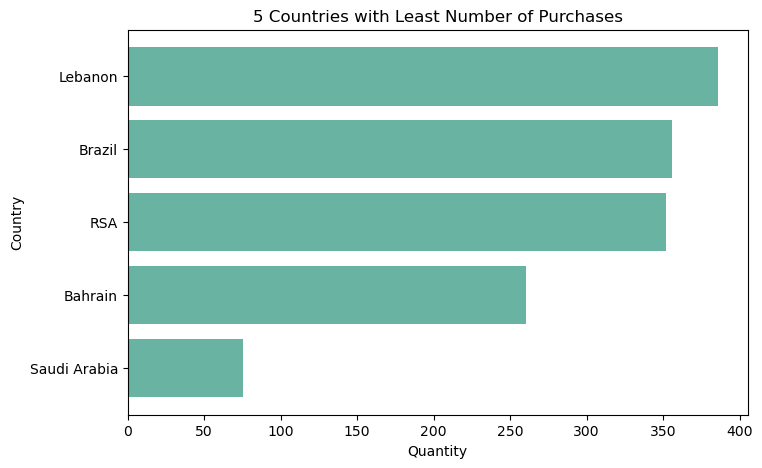

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(bp_country_low, bp_quantity_low, color="#69b3a2")
plt.xlabel('Quantity')
plt.ylabel('Country')
plt.title('5 Countries with Least Number of Purchases')
plt.gca().invert_yaxis()  
plt.show()


#### Tạo bản sao DataFrame chứa các cột quan trọng

In [38]:
new_df = df[['CustomerID','InvoiceNo','StockCode','Quantity','TotalAmount','InvoiceDate','Country']].copy()


#### Chuyển đổi ngày tháng và tạo cột năm từ dữ liệu hóa đơn

In [ ]:
new_df['InvoiceDate'] = pd.to_datetime(new_df['InvoiceDate'], format='%m/%d/%Y %H:%M:%S')
new_df['Year'] = new_df['InvoiceDate'].dt.year
print(new_df.head())


   CustomerID InvoiceNo StockCode  Quantity  TotalAmount         InvoiceDate  \
0     17850.0    536365    85123A         6        15.30 2010-12-01 08:26:00   
1     17850.0    536365     71053         6        20.34 2010-12-01 08:26:00   
2     17850.0    536365    84406B         8        22.00 2010-12-01 08:26:00   
3     17850.0    536365    84029G         6        20.34 2010-12-01 08:26:00   
4     17850.0    536365    84029E         6        20.34 2010-12-01 08:26:00   

          Country  Year  
0  United Kingdom  2010  
1  United Kingdom  2010  
2  United Kingdom  2010  
3  United Kingdom  2010  
4  United Kingdom  2010  


#### Tổng doanh thu theo năm và biểu đồ trực quan
+ Biểu đồ thể hiện tổng doanh thu (TotalAmount) bán hàng từng năm, cho thấy xu hướng biến động doanh số qua các năm. Dữ liệu giúp nhận biết năm nào có doanh thu cao nhất, từ đó đánh giá hiệu quả kinh doanh theo thời gian và lên kế hoạch phát triển phù hợp.

   Year  TotalAmount
0  2010   748957.020
1  2011  8998790.914


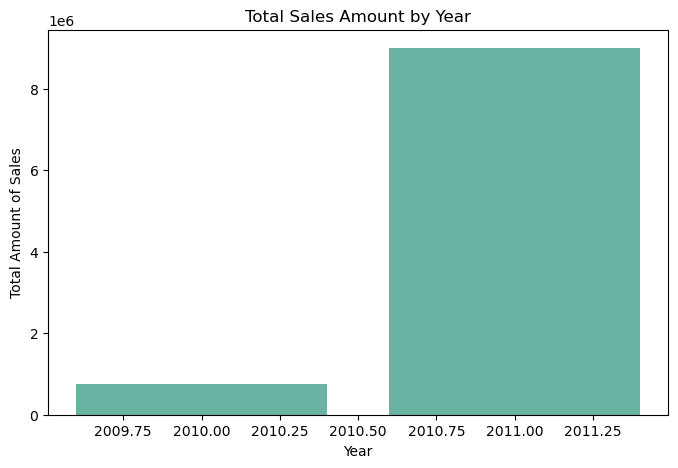

In [ ]:
year_ttlamount = new_df.groupby('Year')['TotalAmount'].sum().reset_index()
print(year_ttlamount)
plt.figure(figsize=(8,5))
plt.bar(year_ttlamount['Year'], year_ttlamount['TotalAmount'], color="#69b3a2")
plt.xlabel('Year')
plt.ylabel('Total Amount of Sales')
plt.title('Total Sales Amount by Year')
plt.show()


#### In 5 dòng đầu của dataframe mới

In [42]:
new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country,Year
0,17850.0,536365,85123A,6,15.30,2010-12-01 08:26:00,United Kingdom,2010
1,17850.0,536365,71053,6,20.34,2010-12-01 08:26:00,United Kingdom,2010
2,17850.0,536365,84406B,8,22.00,2010-12-01 08:26:00,United Kingdom,2010
3,17850.0,536365,84029G,6,20.34,2010-12-01 08:26:00,United Kingdom,2010
4,17850.0,536365,84029E,6,20.34,2010-12-01 08:26:00,United Kingdom,2010


#### Kiểm tra giá trị bị thiếu

In [ ]:
new_df = new_df.dropna()
print(new_df.isna().sum())

CustomerID     0
InvoiceNo      0
StockCode      0
Quantity       0
TotalAmount    0
InvoiceDate    0
Country        0
Year           0
dtype: int64


#### Số lượng khách hàng duy nhất theo từng quốc gia

In [45]:
cus_id = new_df.groupby('Country')['CustomerID'].nunique().reset_index(name='NumberOfCustomers')
cus_id = cus_id.sort_values(by='NumberOfCustomers', ascending=False)
cus_id


,Country,NumberOfCustomers
35,United Kingdom,3950
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,15
12,Finland,12
1,Austria,11


#### Biểu đồ Thanh Ngang: Top 5 Quốc Gia Có Số Lượng Khách Hàng Nhiều Nhất
+ Biểu đồ cho thấy 5 quốc gia đứng đầu về số lượng khách hàng duy nhất, với quốc gia dẫn đầu có khoảng cách rõ rệt so với các nước khác trong top. Điều này phản ánh sự tập trung lớn của khách hàng tại những thị trường chủ chốt, giúp doanh nghiệp tập trung nguồn lực phát triển ở các khu vực tiềm năng nhất.

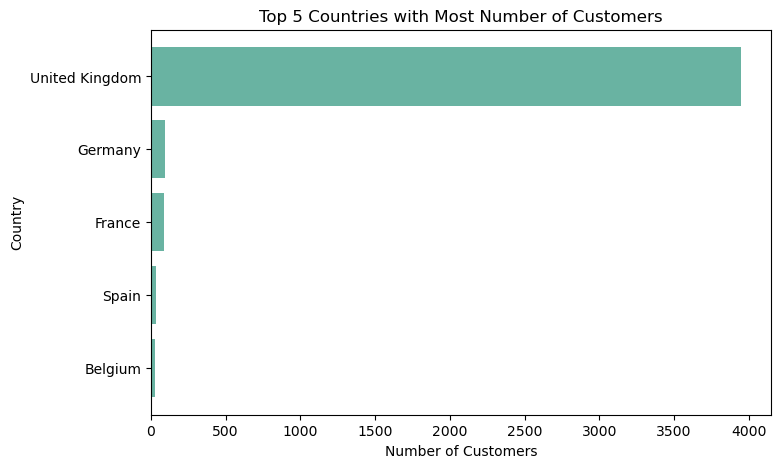

In [ ]:
bp_custid_Country_top = cus_id['Country'].head(5)
bp_custid_CustomerID_top = cus_id['NumberOfCustomers'].head(5)
plt.figure(figsize=(8,5))
plt.barh(bp_custid_Country_top, bp_custid_CustomerID_top, color="#69b3a2")
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.title('Top 5 Countries with Most Number of Customers')
plt.gca().invert_yaxis()  
plt.show()


#### Biểu đồ Thanh Ngang: 5 Quốc Gia Có Số Lượng Khách Hàng Ít Nhất
+ Biểu đồ thể hiện 5 quốc gia có số lượng khách hàng duy nhất thấp nhất trong dữ liệu. Các quốc gia này có số lượng khách hàng khá khiêm tốn, cho thấy thị trường ít phát triển hoặc ít được doanh nghiệp tiếp cận. Việc nhận diện nhóm quốc gia này giúp doanh nghiệp xác định các khu vực tiềm năng cần đầu tư thêm hoặc đánh giá lại chiến lược marketing để mở rộng tệp khách hàng tại các vùng này.

+ Khoảng cách giữa các quốc gia trong nhóm này khá nhỏ, thể hiện mức độ tương đối đồng đều về số lượng khách hàng thấp, không có quốc gia nào quá chênh lệch so với những quốc gia khác trong nhóm.

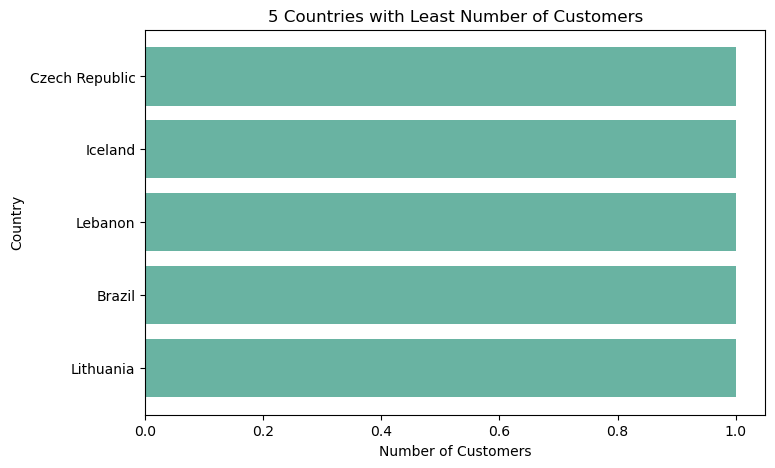

In [ ]:
cus_id_sorted = cus_id.sort_values(by='NumberOfCustomers', ascending=True)
bp_custid_Country_low = cus_id_sorted['Country'].head(5)
bp_custid_CustomerID_low = cus_id_sorted['NumberOfCustomers'].head(5)
plt.figure(figsize=(8,5))
plt.barh(bp_custid_Country_low, bp_custid_CustomerID_low, color="#69b3a2")
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.title('5 Countries with Least Number of Customers')
plt.gca().invert_yaxis()
plt.show()


#### Xử lý dữ liệu thiếu bằng cách loại bỏ các dòng có giá trị NaN

In [52]:
new_df2 = new_df2.dropna()
new_df2.isna().sum()
new_df2.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Description,InvoiceDate,Country,TotalAmount
0,17850.0,536365,85123A,6,2.55,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,15.30
1,17850.0,536365,71053,6,3.39,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,20.34
2,17850.0,536365,84406B,8,2.75,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,22.00
3,17850.0,536365,84029G,6,3.39,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,20.34
4,17850.0,536365,84029E,6,3.39,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,20.34


#### Tính trung bình doanh thu và số lượng bán theo từng sản phẩm

In [ ]:
avg_sales = new_df2.groupby(['StockCode', 'Description']).agg({
    'TotalAmount': 'mean',
    'Quantity': 'mean'
}).reset_index()
avg_sales = avg_sales.sort_values(by='Quantity', ascending=False)
avg_sales

,StockCode,Description,TotalAmount,Quantity
3198,47556B,TEA TIME TEA TOWELS,3022.500000,1300.000000
2748,84568,GIRLS ALPHABET IRON ON PATCHES,97.200000,520.000000
2805,84826,ASSTD DESIGN 3D PAPER STICKERS,9.145405,368.702703
42,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,21.320000,325.333333
195,20914,SET/5 RED SPOTTY LID GLASS BOWLS,734.400000,288.000000
...,...,...,...,...
494,21412,VINTAGE GOLD TINSEL REEL,-2.520000,-6.000000
3298,79323W,WHITE CHERRY LIGHTS,-54.000000,-8.000000
314,21144,PINK POODLE HANGING DECORATION,-4.560000,-12.000000
3911,D,Discount,-73.976883,-15.506494
